In [1]:
# Step1: Import required libraries.

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
# Step 2: Load/Read dataset from CSV File format
Jobs = pd.read_csv("Jobs.csv")  #Jobs file contains attribute/features of jobs(item)
Jobs.head() # get first five rows from dataset

,Title,Category,Location,Pre-Interview form,RC,HM,Description,Skills,Education,Posting Type,Job Type,Start Date,End Date,State,Country,JobId
0,QA,IT,Bangalore,A,oneco RC,Oneco HM,Minimum 1 year of experince in Manual Testing\...,"Manual Testing,\nAutomation Testing,\nSQL,\nTe...",BE/BCA/MCA,External,Full-time,4/7/2013,5/9/2013,Karnataka,India,A-101
1,Branch Marketing Manager,Marketing,Bangalore,B,oneco RC,Oneco HM,Develop marketing initiative to expand custome...,"Sales,Telesales",MBA,External,Full-time,NaN,NaN,Karnataka,India,A-102
2,Senior UI developer,IT,Mumbai,B,oneco RC,Oneco HM,Develops Software to help communication,"Code,HTML,OOP,UI",NaN,External,Full-time,9/12/2016,10/1/2017,Maharashtra,India,A-103
3,Staff-engineer,IT,Hyderabad,A,oneco RC,Oneco HM,"Imporove tools to automate the deployment =, a...","Networking,Data processing,Admin,Puppet",BE/BCA/MCA,External,Full-time,3/1/2028,15/8/1018,Telangana,India,A-104
4,Senoir QA,IT,Bangalore,A,oneco RC,Oneco HM,Minimum 3 year of experince in Manua & Automat...,"Manual Testing,\nAutomation Testing,\nSQL,\nTe...",BE/BCA/MCA,External,Full-time,4/3/2018,5/7/2018,NaN,NaN,A-105


In [3]:
Jobs.columns # Column names from dataset 

Index([' Title', 'Category', 'Location', 'Pre-Interview form', 'RC', 'HM',
       'Description', 'Skills ', 'Education', 'Posting Type', 'Job Type',
       'Start Date', 'End Date', 'State', 'Country', 'JobId'],
      dtype='object')

In [5]:
users = pd.read_csv("User.csv") #Users file contais attribute/features of candiadte/User(item)
users.head()

,CANDIDATE_ID,FIRSTN,LASTN,EMAIL,MOBILE,ADDRESS,CITY,STATE,COUNTRY,EDUCATION,Skills,JOB_ID
0,2021,Shruti,Bokkawar,shruti@gmal.com,4572890232,Horamavu,Mumbai,Maharashtra,India,BE,"Selenium,Automation,Manual",A-105
1,2050,Piyush,Rode,piyush@gmal.com,988375334,hebbal,Bangalore,Karnataka,India,BE,"Networking,Data processing,Admin,Puppet, SAS, ...",A108
2,2086,Aniket,Gore,aniket@gmal.com,998555334,katraj,Bangalore,Karnataka,India,BE,"Code,HTML,OOP,UI,SOAP,API",A109
3,2020,Anup,Bokkawar,anup@gmal.com,67890232,Hoiramavu,Bangalore,Karnataka,India,MBA,"Screening,Hiring sourcing,Planning",A107
4,2056,Keshav,rane,kjhkjh@hkh.kjhk,9898798,banjara Hills,Hyderabad,Telangana,India,MBA,"Team management,Kanban,Agile",A-110


In [6]:
users.columns

Index(['CANDIDATE_ID', 'FIRSTN', 'LASTN', 'EMAIL', 'MOBILE', 'ADDRESS', 'CITY',
       'STATE', 'COUNTRY', 'EDUCATION', 'Skills', 'JOB_ID'],
      dtype='object')

In [7]:
# Step 3: Now will Do Exploratory Data Analysis (EDA) and Pre-processing.
# Split the data into train & test 
jobs_train, jobs_test =  train_test_split(Jobs,test_size=0.20, random_state=10)

In [9]:

users_train, users_test =  train_test_split(users,test_size=0.20, random_state=10)

In [10]:
############ Data Analysisi for job openings based on their location
overall_location_wise = Jobs.groupby(['Location','State','Country']).size().reset_index(name='Locationwise')
print(overall_location_wise)

    Location        State Country  Locationwise
0  Bangalore    Karnataka   India             5
1  Hyderabad    Telangana   India             2
2     Mumbai  Maharashtra   India             2


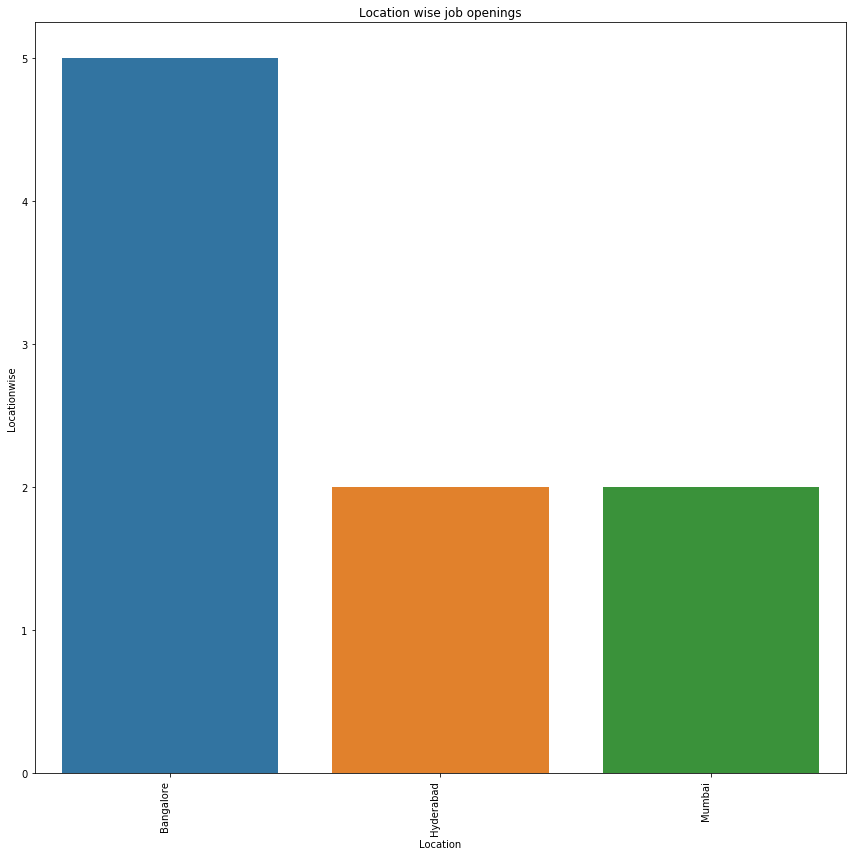

In [11]:
########### locationwise openings on graph

plt.figure(figsize=(12,12))
ax = sns.barplot(x="Location", y="Locationwise", data=overall_location_wise)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Location wise job openings')
plt.tight_layout()
plt.show()

In [12]:
################## state wise jobs openings
State_wise_job_US = Jobs.groupby(['State']).size().reset_index(name='state_wise').sort_values('state_wise',ascending=False)
print(State_wise_job_US)

         State  state_wise
0    Karnataka           5
1  Maharashtra           2
2    Telangana           2


In [13]:
############## city wise jobs

city_wise_jobs = Jobs.groupby(['Location']).size().reset_index(name= 'city_wise').sort_values('city_wise', ascending = False)
print(city_wise_jobs)

    Location  city_wise
0  Bangalore          6
1  Hyderabad          2
2     Mumbai          2


In [14]:
######################## Now find out jobseekers/candiadtes overall 
overall_js = users.groupby(['CITY','STATE','COUNTRY']).size().reset_index(name='overall_js')
print(overall_js)

        CITY        STATE COUNTRY  overall_js
0  Bangalore    Karnataka   India           3
1  Hyderabad    Telangana   India           2
2     Mumbai  Maharashtra   India           1


In [15]:
######### state wise
state_wise_js = users.groupby(['STATE']).size().reset_index(name='state_js')
print(state_wise_js)

         STATE  state_js
0    Karnataka         3
1  Maharashtra         1
2    Telangana         2


In [16]:
############ city wise
city_wise_js = users.groupby(['CITY']).size().reset_index(name = 'city_js')
print(city_wise_js)


        CITY  city_js
0  Bangalore        3
1  Hyderabad        2
2     Mumbai        1


In [17]:
# Content based System
# Here we will find out the simillar jobs based Using Tf-Idf method
jobs_line = Jobs.iloc[0:13,0:15] # Instead of using main file Jobs

In [19]:
jobs_line.head()
jobs_line.columns

Index([' Title', 'Category', 'Location', 'Pre-Interview form', 'RC', 'HM',
       'Description', 'Skills ', 'Education', 'Posting Type', 'Job Type',
       'Start Date', 'End Date', 'State', 'Country'],
      dtype='object')

In [20]:
# Filling NaNs values with empty string
jobs_line['Description']=jobs_line[' Title'].fillna('')+ jobs_line['Description'].fillna('')

In [22]:
jobs_line.head()

,Title,Category,Location,Pre-Interview form,RC,HM,Description,Skills,Education,Posting Type,Job Type,Start Date,End Date,State,Country
0,QA,IT,Bangalore,A,oneco RC,Oneco HM,QAMinimum 1 year of experince in Manual Testin...,"Manual Testing,\nAutomation Testing,\nSQL,\nTe...",BE/BCA/MCA,External,Full-time,4/7/2013,5/9/2013,Karnataka,India
1,Branch Marketing Manager,Marketing,Bangalore,B,oneco RC,Oneco HM,Branch Marketing ManagerDevelop marketing init...,"Sales,Telesales",MBA,External,Full-time,NaN,NaN,Karnataka,India
2,Senior UI developer,IT,Mumbai,B,oneco RC,Oneco HM,Senior UI developerDevelops Software to help c...,"Code,HTML,OOP,UI",NaN,External,Full-time,9/12/2016,10/1/2017,Maharashtra,India
3,Staff-engineer,IT,Hyderabad,A,oneco RC,Oneco HM,Staff-engineerImporove tools to automate the d...,"Networking,Data processing,Admin,Puppet",BE/BCA/MCA,External,Full-time,3/1/2028,15/8/1018,Telangana,India
4,Senoir QA,IT,Bangalore,A,oneco RC,Oneco HM,Senoir QAMinimum 3 year of experince in Manua ...,"Manual Testing,\nAutomation Testing,\nSQL,\nTe...",BE/BCA/MCA,External,Full-time,4/3/2018,5/7/2018,NaN,NaN


In [25]:
# Tf-Idf function 
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 3),min_df=0, stop_words='english')

In [26]:
# Fitting the Tf-Idf on the 'Description' text
tfidf_matrix = tf.fit_transform(jobs_line['Description'])


In [27]:
tfidf_matrix.shape # Weighted matrix 

(10, 158)

In [29]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix) # find out sigmoid kernel

In [30]:
# Generating indices and movie titles
jobs_line = jobs_line.reset_index()
titles = jobs_line[' Title']

In [31]:
print(titles)

0                          QA
1    Branch Marketing Manager
2         Senior UI developer
3              Staff-engineer
4                   Senoir QA
5                UI developer
6        Senoir Sales Manager
7         Senior staff Devops
8                HR Executive
9                         NaN
Name:  Title, dtype: object


In [32]:
# indices for titles
indices = pd.Series(jobs_line.index, index=jobs_line[' Title'])
print(indices)

 Title
QA                          0
Branch Marketing Manager    1
Senior UI developer         2
Staff-engineer              3
Senoir QA                   4
UI developer                5
Senoir Sales Manager        6
Senior staff Devops         7
HR Executive                8
NaN                         9
dtype: int64


In [33]:
indices['HR Executive']

8

In [34]:
# We buld now one function which will accept the Title of the job & recommend or suggest similar jobs
def get_job_recommendations(Title):
    idx = indices[Title]
   # print (idx)
    sim_scores = list(enumerate(sig[idx]))
    #print (sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   # print(sim_scores)
    job_indices = [i[0] for i in sim_scores]
    job_Title = [titles[i] for i in job_indices]
  #  print(job_Title)
    return job_Title

In [37]:
# Now we will test the model by calling a function & passing title of job 
get_job_recommendations('QA')[:3]

['QA', 'Senoir QA', 'Branch Marketing Manager']

In [38]:
# So these job suggestions will be given to the Users/candiadtes
